In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ranksums
import seaborn as sns
import matplotlib.pyplot as plt



## Sierra Leone

In [2]:
slcase_symptom_tosave = pd.read_csv('../../tables/Symptoms_SL_Summary.tsv', sep='\t', index_col=0)
slage = slcase_symptom_tosave['Age']
slagebin = slcase_symptom_tosave['Age_Bin']
slcase_symptom= slcase_symptom_tosave.iloc[:, :-2]
slcase_symptom = slcase_symptom.rename(columns={'Vomit':'Vomiting', 'FEVER':'Fever'})
slcase_symptom = slcase_symptom.drop('Bleeding/DIC', axis=1)

outcome_tosave = pd.read_csv('../../tables/Outcome_SL_Summary.tsv', sep='\t', index_col=0)
slcase_symptom = pd.merge(left=slcase_symptom, right=outcome_tosave[['Fatal_Outcome']], left_index=True, right_index=True, how='left')
slage = slage.loc[slcase_symptom.index]
cut_bins = [0, 10, 20, 30, 40, 100]
slagebin = pd.cut(slage, bins=cut_bins, right=False)
slcase_symptom.head()

,Bleeding,Sore throat,Cough,Vomiting,Diarrhea,Headache,Abdominal pain,Weakness,Jaundice,Swelling,Fever,Fatal_Outcome
1DENTITY NUMBER,,,,,,,,,,,,
WG0284565-DNA_A08_G-7030,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
WG0284565-DNA_A09_G-7022,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
WG0284565-DNA_B08_G-7260,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
WG0284565-DNA_B10_G-7140,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
WG0284565-DNA_E08_G-6835,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


In [3]:
res = []
for c in slcase_symptom.columns:
    ct = pd.crosstab(slcase_symptom[c], slagebin)
    c2, p_c2, _, _ = chi2_contingency(ct)
    (H,P_ran) = ranksums(slage.loc[slcase_symptom[c]==1], slage.loc[slcase_symptom[c]==0])
    freq = (slcase_symptom[c]==1).sum() / ((slcase_symptom[c]==1).sum() + (slcase_symptom[c]==0).sum())
    res.append([c, freq, p_c2, H, P_ran])

slres = pd.DataFrame(res, columns=['Symptom', 'Frequency', 'Chi2_P', 'Ranksum_H', 'Ranksum_P'])
slres.index = slres['Symptom']
slres = slres.iloc[:, 1:]
slres

,Frequency,Chi2_P,Ranksum_H,Ranksum_P
Symptom,,,,
Bleeding,0.410714,0.734046,-1.351409,0.176565
Sore throat,0.616071,0.431440,-0.152557,0.878747
Cough,0.767857,0.002921,-3.211452,0.001321
Vomiting,0.660714,0.043856,-2.504214,0.012272
Diarrhea,0.500000,0.478798,-1.472258,0.140951
Headache,0.767857,0.083289,1.867604,0.061817
Abdominal pain,0.517857,0.928932,-0.040760,0.967487
Weakness,0.821429,0.087335,-2.005610,0.044898
Jaundice,0.080357,0.477775,1.262971,0.206599


## Nigeria

In [4]:
ngdata_to_save = pd.read_csv('../../tables/Symptoms_NG_Summary.tsv', sep='\t', index_col=0)
ngdata_to_save.index = ngdata_to_save['GWAS_ID']
ngdata_to_save

ngage = ngdata_to_save['Age']
ngagebin = ngdata_to_save['Age_Bin']
ngcase_symptom= ngdata_to_save.iloc[:, 5:-2]
ngcase_symptom.columns = [x.capitalize() for x in ngcase_symptom.columns]
ngcase_symptom = ngcase_symptom.rename(columns={'Conjunctiva injection':'Injection'})
ngcase_symptom = ngcase_symptom.drop('Chest pain', axis=1)
ngcase_symptom['Fever'] = ngcase_symptom['Fever_objective'] # Get rid of the old subjective symptom of Fever and replace with objective
ngcase_symptom = ngcase_symptom.drop('Fever_objective', axis=1)

outcome_tosave = pd.read_csv('../../tables/Outcome_NG_Summary.tsv', sep='\t', index_col=0)
ngcase_symptom = pd.merge(left=ngcase_symptom, right=outcome_tosave[['Fatal_Outcome']], left_index=True, right_index=True,
         how='outer')

In [5]:
ngcase_symptom.head()

,Bleeding,Injection,Abdominal pain,Cough,Sore throat,Vomiting,Diarrhea,Headache,Weakness,Fever,Fatal_Outcome
Fall2013_SM-39NBE,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
Fall2013_SM-4CDK8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Fall2013_SM-4CDKB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Fall2013_SM-4CDKC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Fall2013_SM-4CDKW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [6]:
ngage = outcome_tosave.loc[ngcase_symptom.index, 'Age']
ind = list(set(ngage.index[ngage.isnull()]).intersection(ngdata_to_save.index))
ngage.loc[ind] = ngdata_to_save.loc[ind, 'Age']

cut_bins = [0, 10, 20, 30, 40, 100]
ngagebin = pd.cut(ngage, bins=cut_bins, right=False)

/opt/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:947: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [7]:
ngres = []
for c in ngcase_symptom.columns:
    ct = pd.crosstab(ngcase_symptom[c], ngagebin)
    c2, p_c2, _, _ = chi2_contingency(ct)
    (H,P_ran) = ranksums(ngage.loc[ngcase_symptom[c]==1], ngage.loc[ngcase_symptom[c]==0])
    freq = (ngcase_symptom[c]==1).sum() / ((ngcase_symptom[c]==1).sum() + (ngcase_symptom[c]==0).sum())

    ngres.append([c, freq, p_c2, H, P_ran])

ngres = pd.DataFrame(ngres, columns=['Symptom', 'Frequency', 'Chi2_P', 'Ranksum_H', 'Ranksum_P'])
ngres.index = ngres['Symptom']
ngres = ngres.iloc[:, 1:]
ngres

,Frequency,Chi2_P,Ranksum_H,Ranksum_P
Symptom,,,,
Bleeding,0.232143,0.577282,-1.347294,0.177886
Injection,0.062500,0.365071,1.075798,0.282018
Abdominal pain,0.491071,0.789879,0.293917,0.768822
Cough,0.267857,0.514494,-1.770690,0.076612
Sore throat,0.241071,0.907717,0.030611,0.975580
Vomiting,0.571429,0.127699,-2.404718,0.016185
Diarrhea,0.214286,0.509263,-0.124092,0.901243
Headache,0.535714,0.005583,0.603830,0.545957
Weakness,0.419643,0.433848,0.781199,0.434685


In [8]:
ngcase_symptom.unstack().reset_index().head()

,level_0,level_1,0
0,Bleeding,Fall2013_SM-39NBE,1.0
1,Bleeding,Fall2013_SM-4CDK8,NaN
2,Bleeding,Fall2013_SM-4CDKB,NaN
3,Bleeding,Fall2013_SM-4CDKC,NaN
4,Bleeding,Fall2013_SM-4CDKW,NaN


In [9]:
ngflat = pd.merge(left=ngcase_symptom.unstack().reset_index(), right=pd.DataFrame(ngage), left_on='level_1',
         right_index=True, how='left')
ngflat.columns = ['Symtpom', 'Sample', 'Present', 'Age']
ngflat['Present'] = ngflat['Present'].replace({1:'Present', 0:'Absent'})

slflat = pd.merge(left=slcase_symptom.unstack().reset_index(), right=pd.DataFrame(slage), left_on='1DENTITY NUMBER',
         right_index=True, how='left')
slflat.columns = ['Symtpom', 'Sample', 'Present', 'Age']
slflat['Present'] = slflat['Present'].replace({1:'Present', 0:'Absent'})

In [10]:
ngres.index

Index(['Bleeding', 'Injection', 'Abdominal pain', 'Cough', 'Sore throat',
       'Vomiting', 'Diarrhea', 'Headache', 'Weakness', 'Fever',
       'Fatal_Outcome'],
      dtype='object', name='Symptom')

In [11]:
slres.index

Index(['Bleeding', 'Sore throat', 'Cough', 'Vomiting', 'Diarrhea', 'Headache',
       'Abdominal pain', 'Weakness', 'Jaundice', 'Swelling', 'Fever',
       'Fatal_Outcome'],
      dtype='object', name='Symptom')

In [12]:
set(ngres.index).intersection(slres.index)

{'Abdominal pain',
 'Bleeding',
 'Cough',
 'Diarrhea',
 'Fatal_Outcome',
 'Fever',
 'Headache',
 'Sore throat',
 'Vomiting',
 'Weakness'}

In [13]:
set(ngres.index) - set(slres.index)

{'Injection'}

In [14]:
set(slres.index) - set(ngres.index)

{'Jaundice', 'Swelling'}

In [15]:
order = list(ngres.sort_values(by='Ranksum_H', ascending=False).index) + ['Jaundice', 'Swelling']
order

['Fatal_Outcome',
 'Injection',
 'Weakness',
 'Headache',
 'Abdominal pain',
 'Sore throat',
 'Diarrhea',
 'Fever',
 'Bleeding',
 'Cough',
 'Vomiting',
 'Jaundice',
 'Swelling']

Text(0.5, 1.0, 'Sierra Leone Cohort')

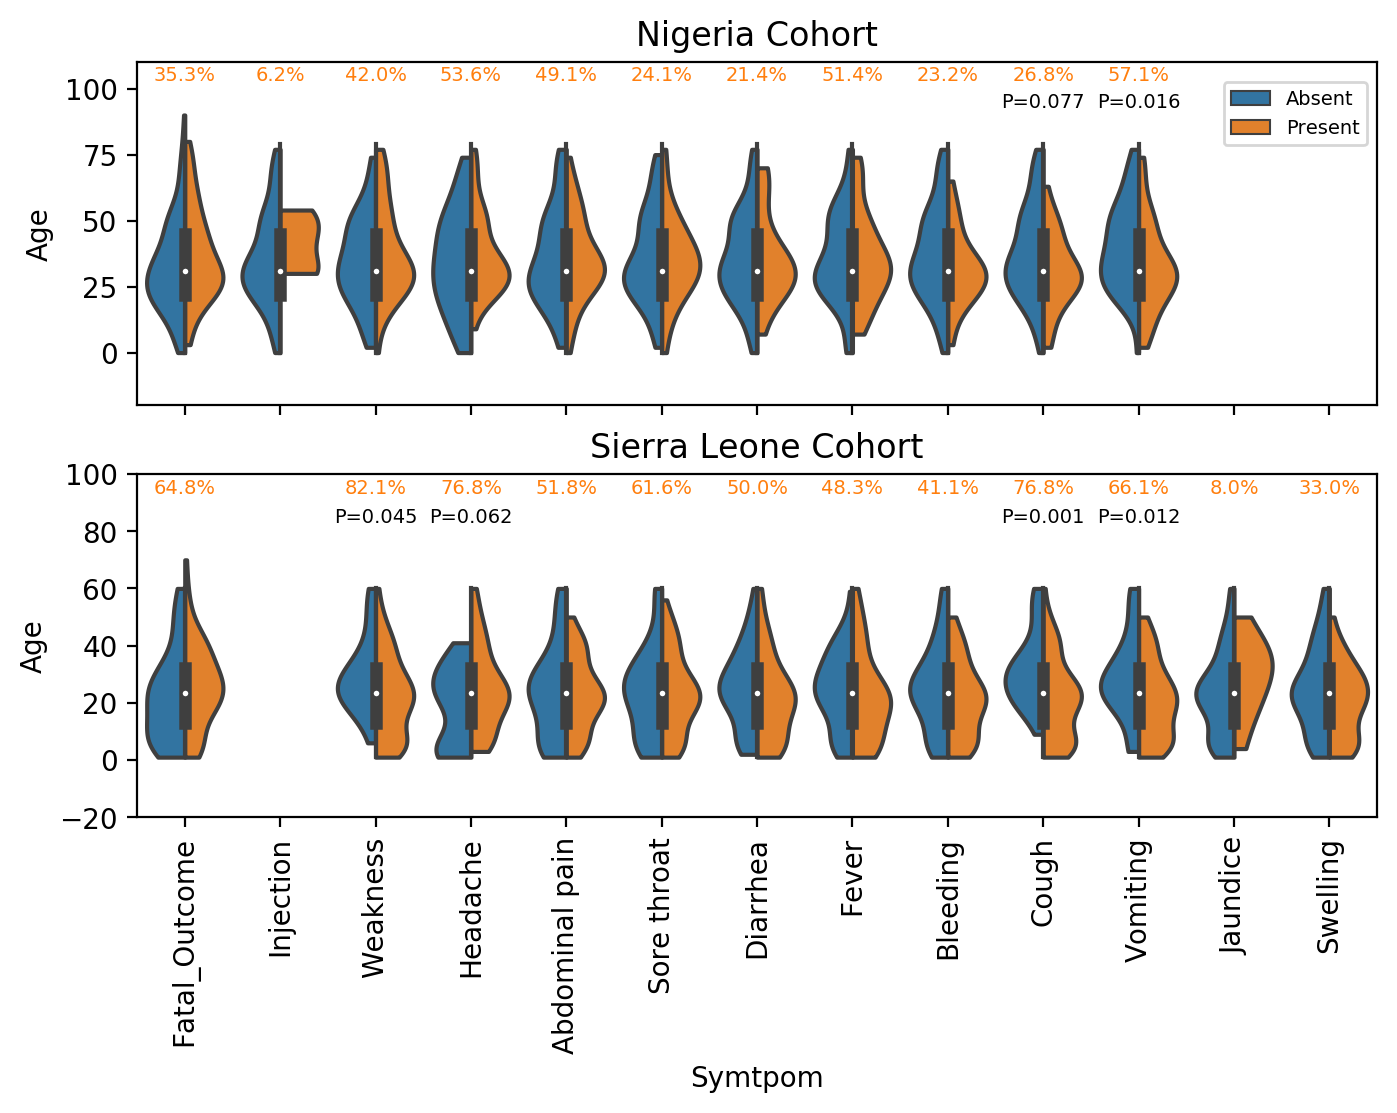

In [16]:
present_color = sns.color_palette("tab10")[1]

fig,axes = plt.subplots(2,1, figsize=(8,5), dpi=200)
sns.violinplot(x='Symtpom', y='Age', hue='Present', data=ngflat, ax=axes[0],
               order=order, split=True, cut=0, hue_order=['Absent', 'Present'],
              scale='width')
axes[0].set_xticklabels(order, rotation=90)
axes[0].legend(bbox_to_anchor=(1,.97), fontsize=7)
axes[0].set_xticklabels([])

sns.violinplot(x='Symtpom', y='Age', hue='Present', data=slflat, ax=axes[1],
               order=order, split=True, cut=0, hue_order=['Absent', 'Present'],
              scale='width')
axes[1].set_xticklabels(order, rotation=90)
axes[1].get_legend().remove()


for i,s in enumerate(order):
    if s in ngres.index:
        axes[0].text(i, 105, '%.1f' % (ngres.at[s, 'Frequency']*100) + '%', fontsize=7,
                    ha='center', va='center', color=present_color)
        
        if ngres.loc[s, 'Ranksum_P'] < .1:
            axes[0].text(i, 95, 'P=%.3f' % np.round(ngres.at[s, 'Ranksum_P'], 3), fontsize=7,
                    ha='center', va='center', color='k')
        
    if s in slres.index:
        axes[1].text(i, 95, '%.1f' % (slres.at[s, 'Frequency']*100) + '%', fontsize=7,
                    ha='center', va='center', color=present_color)

        if slres.loc[s, 'Ranksum_P'] < .1:
            axes[1].text(i, 85, 'P=%.3f' % np.round(slres.at[s, 'Ranksum_P'], 3), fontsize=7,
                    ha='center', va='center', color='k')
        
axes[0].set_ylim([-20, 110])
axes[1].set_ylim([-20, 100])
axes[0].set_title('Nigeria Cohort')
axes[0].set_xlabel(None)

axes[1].set_title('Sierra Leone Cohort')


In [18]:
slcase_symptom_forsumm = slcase_symptom.drop('Fatal_Outcome', axis=1)
total = slcase_symptom_forsumm.mean(axis=0)
slcase_symptom_summary = slcase_symptom_forsumm.groupby(slagebin).mean().T

vc = slagebin.value_counts()
for v in vc.index:
    vs = str(v)
    vc.loc[v] = vs.split(',')[0][1:] + '-' +vs.split(', ')[1][:-1] + ' (N=%d)' % vc.at[v]

slcase_symptom_summary = slcase_symptom_summary.rename(columns=vc.to_dict())

tval = 'Total (N=%d)' % slcase_symptom_forsumm.shape[0]
slcase_symptom_summary[tval] = total
slcase_symptom_summary = slcase_symptom_summary.applymap(lambda x: np.round(x*100,1))
slcase_symptom_summary = slcase_symptom_summary.sort_values(by=tval, ascending=False)

sig = slres.loc[slcase_symptom_summary.index, ['Ranksum_H', 'Ranksum_P']].rename(columns={'Ranksum_H':'Z', 'Ranksum_P':'P'}) #.applymap(lambda x: np.round(x,3))
slcase_symptom_summary['Z'] = sig['Z'].apply(lambda x: np.round(x,2))
slcase_symptom_summary['P'] = sig['P'].apply(lambda x: np.round(x,3))
slcase_symptom_summary.to_csv('../../tables/SL_clinical_summary.tsv', sep='\t')
slcase_symptom_summary

Age,0-10 (N=27),10-20 (N=16),20-30 (N=39),30-40 (N=19),40-100 (N=21),Total (N=122),Z,P
Weakness,96.2,93.3,71.4,75.0,80.0,82.1,-2.01,0.045
Cough,96.2,80.0,80.0,43.8,70.0,76.8,-3.21,0.001
Headache,61.5,93.3,77.1,68.8,90.0,76.8,1.87,0.062
Vomiting,80.8,86.7,60.0,43.8,60.0,66.1,-2.50,0.012
Sore throat,57.7,73.3,62.9,43.8,70.0,61.6,-0.15,0.879
Abdominal pain,46.2,60.0,54.3,50.0,50.0,51.8,-0.04,0.967
Diarrhea,57.7,60.0,48.6,31.2,50.0,50.0,-1.47,0.141
Fever,57.1,61.5,42.3,25.0,52.9,48.3,-1.18,0.237
Bleeding,50.0,46.7,40.0,31.2,35.0,41.1,-1.35,0.177
Swelling,42.3,33.3,31.4,37.5,20.0,33.0,-1.39,0.163


In [19]:
ngcase_symptom_forsumm = ngcase_symptom.drop(['Fatal_Outcome'], axis=1).dropna()

total = ngcase_symptom_forsumm.mean(axis=0)
ngcase_symptom_summary = ngcase_symptom_forsumm.groupby(ngagebin.loc[ngcase_symptom_forsumm.index]).mean().T

vc = ngagebin.loc[ngcase_symptom_forsumm.index].value_counts()
for v in vc.index:
    vs = str(v)
    vc.loc[v] = vs.split(',')[0][1:] + '-' +vs.split(', ')[1][:-1] + ' (N=%d)' % vc.at[v]
    
ngcase_symptom_summary = ngcase_symptom_summary.rename(columns=dict(zip(list(vc.index), list(vc.values))))

tval = 'Total (N=%d)' % ngcase_symptom_forsumm.shape[0]
ngcase_symptom_summary[tval] = total
ngcase_symptom_summary = ngcase_symptom_summary.applymap(lambda x: np.round(x*100,1))

order = [x for x in slcase_symptom_summary.index if x in ngcase_symptom_summary.index]
order = order + list(set(ngcase_symptom_summary.index) - set(slcase_symptom_summary.index))
ngcase_symptom_summary = ngcase_symptom_summary.loc[order, :]

sig = ngres.loc[ngcase_symptom_summary.index, ['Ranksum_H', 'Ranksum_P']].rename(columns={'Ranksum_H':'Z', 'Ranksum_P':'P'}) #.applymap(lambda x: np.round(x,3))
ngcase_symptom_summary['Z'] = sig['Z'].apply(lambda x: np.round(x,2))
ngcase_symptom_summary['P'] = sig['P'].apply(lambda x: np.round(x,3))
ngcase_symptom_summary.to_csv('../../tables/NG_clinical_summary.tsv', sep='\t')

In [20]:
ngcase_symptom_summary

Age,0-10 (N=6),10-20 (N=8),20-30 (N=26),30-40 (N=31),40-100 (N=38),Total (N=109),Z,P
Weakness,16.7,25.0,53.8,45.2,42.1,43.1,0.78,0.435
Cough,33.3,37.5,34.6,22.6,18.4,25.7,-1.77,0.077
Headache,16.7,12.5,76.9,61.3,50.0,55.0,0.60,0.546
Vomiting,83.3,87.5,57.7,58.1,47.4,57.8,-2.40,0.016
Sore throat,16.7,25.0,26.9,29.0,21.1,24.8,0.03,0.976
Abdominal pain,50.0,37.5,46.2,58.1,47.4,49.5,0.29,0.769
Diarrhea,16.7,12.5,30.8,16.1,21.1,21.1,-0.12,0.901
Fever,33.3,87.5,42.3,58.1,47.4,51.4,-0.17,0.868
Bleeding,16.7,25.0,30.8,29.0,15.8,23.9,-1.35,0.178
Injection,0.0,0.0,0.0,9.7,10.5,6.4,1.08,0.282


[Text(0, 0, 'BLEEDING'),
 Text(0, 0, 'CONJUNCTIVA INJECTION'),
 Text(0, 0, 'ABDOMINAL PAIN'),
 Text(0, 0, 'COUGH'),
 Text(0, 0, 'SORE THROAT'),
 Text(0, 0, 'VOMITING'),
 Text(0, 0, 'DIARRHEA'),
 Text(0, 0, 'HEADACHE'),
 Text(0, 0, 'WEAKNESS'),
 Text(0, 0, 'FEVER'),
 Text(0, 0, 'CHEST PAIN')]

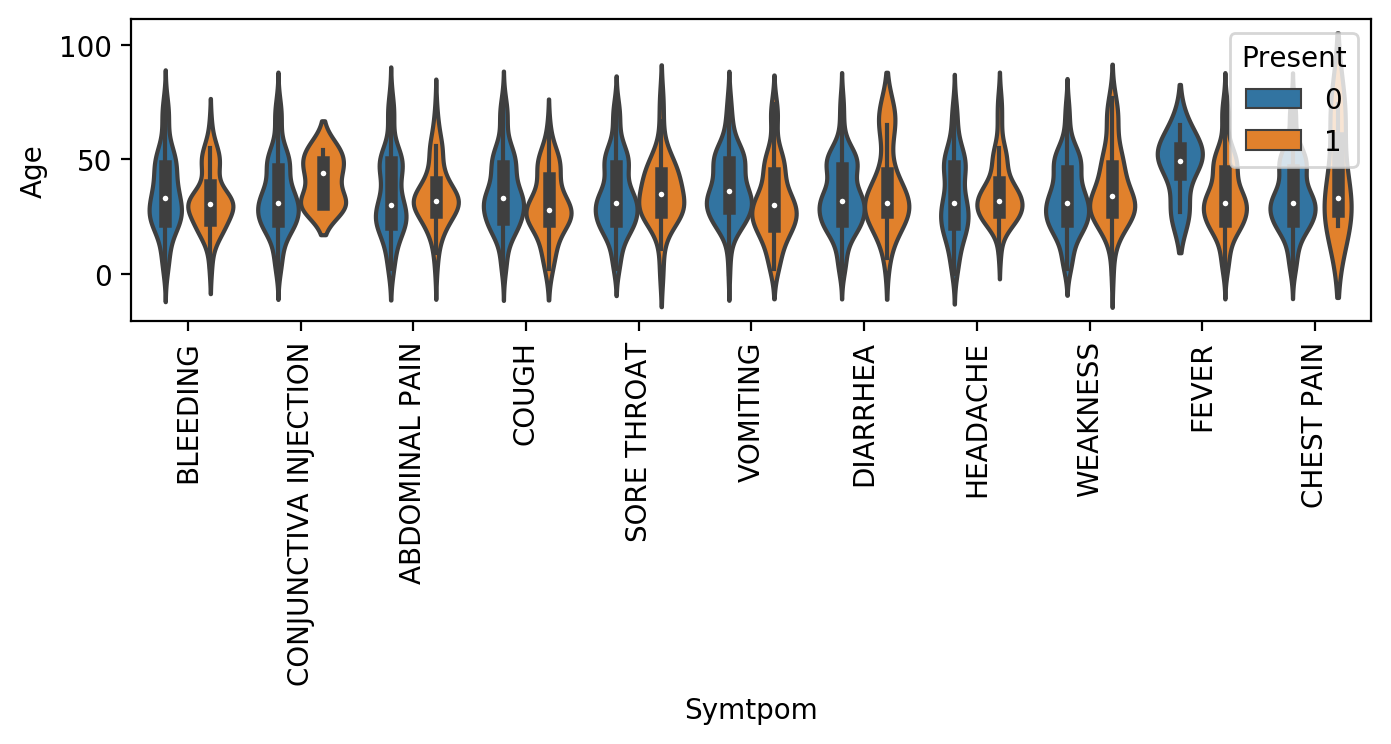

In [98]:
ngflat = pd.merge(left=ngcase_symptom.unstack().reset_index(), right=pd.DataFrame(ngage), left_on='GWAS_ID',
         right_index=True, how='left')
ngflat.columns = ['Symtpom', 'Sample', 'Present', 'Age']

fig,axes = plt.subplots(1,1, figsize=(8,2), dpi=200)

sns.violinplot(x='Symtpom', y='Age', hue='Present', data=ngflat, ax=axes,
               order=ngres.index, split=False)
axes.set_xticklabels(ngres.index, rotation=90)

[Text(0, 0, 'BLEEDING'),
 Text(0, 0, 'CONJUNCTIVA INJECTION'),
 Text(0, 0, 'ABDOMINAL PAIN'),
 Text(0, 0, 'COUGH'),
 Text(0, 0, 'SORE THROAT'),
 Text(0, 0, 'VOMITING'),
 Text(0, 0, 'DIARRHEA'),
 Text(0, 0, 'HEADACHE'),
 Text(0, 0, 'WEAKNESS'),
 Text(0, 0, 'FEVER'),
 Text(0, 0, 'CHEST PAIN')]

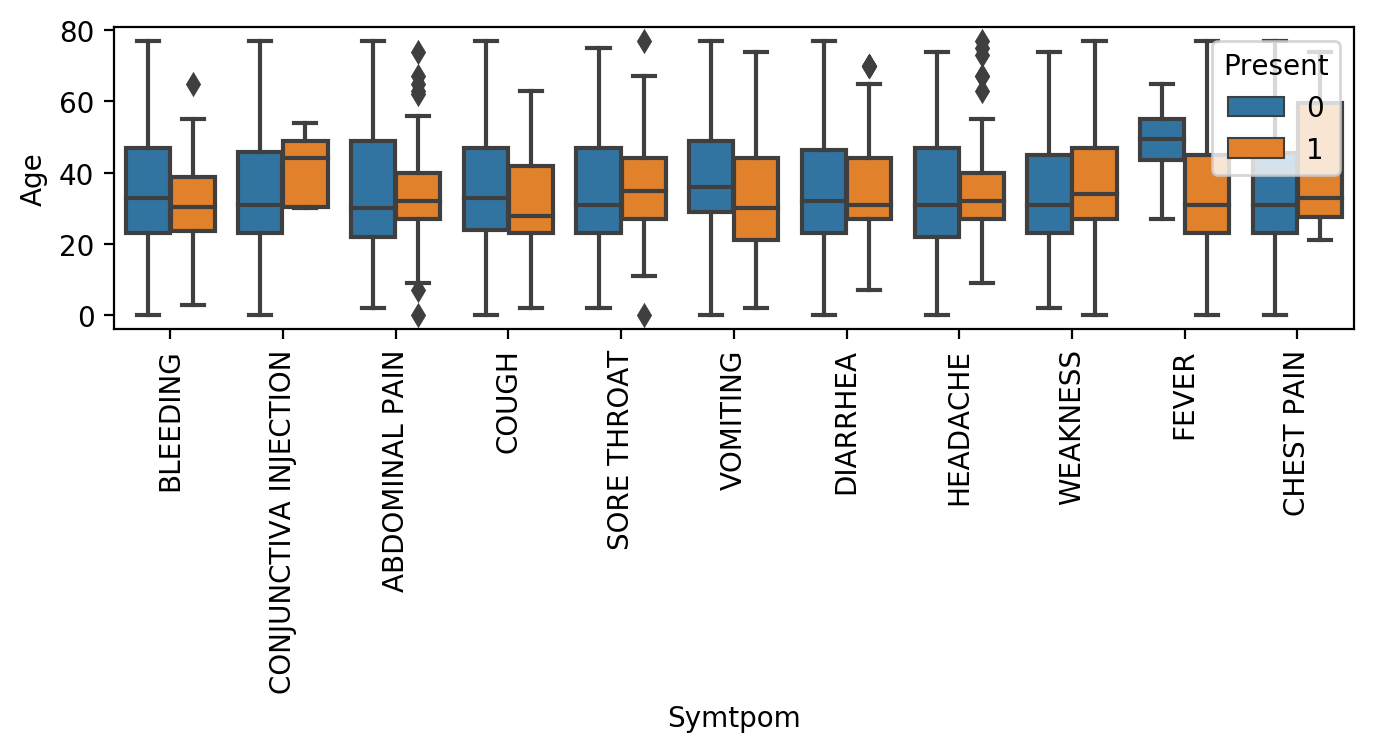

In [100]:
ngflat = pd.merge(left=ngcase_symptom.unstack().reset_index(), right=pd.DataFrame(ngage), left_on='GWAS_ID',
         right_index=True, how='left')
ngflat.columns = ['Symtpom', 'Sample', 'Present', 'Age']

fig,axes = plt.subplots(1,1, figsize=(8,2), dpi=200)

sns.boxplot(x='Symtpom', y='Age', hue='Present', data=ngflat, ax=axes,
               order=ngres.index)
axes.set_xticklabels(ngres.index, rotation=90)